# Predictive-Maintenance-Model

### Objective

#### Predict the remaining time (MTTF) before failure for industrial equipment using provided sensor and operational data.

### 1. Importing the dependencies

In [267]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### 2. Data Loading and Understanding

In [268]:
# Load the dataset
data = pd.read_excel('PM DATA Training.xlsx')
print(data.shape)



(22314, 7)


In [269]:
print(data.head())

   UID      ProductType  Humidity  Temperature  Age  Quantity  MTTF 
0    1         Extruder      5.88        66.17   13     39764     69
1    2  Pressure Cutter     42.76        40.29    4     45181    532
2    3         Extruder     76.62        52.08    4     70397     93
3    4             Pump     45.91        90.26   14     49470    183
4    5    Gauge Machine     78.87        58.56   12     45145    447


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22314 entries, 0 to 22313
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UID          22314 non-null  int64  
 1   ProductType  22314 non-null  object 
 2   Humidity     22314 non-null  float64
 3   Temperature  22314 non-null  float64
 4   Age          22314 non-null  int64  
 5   Quantity     22314 non-null  int64  
 6   MTTF         22314 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.2+ MB


In [271]:
# drop the 'customerID' column as it is not useful for analysis
data.drop(columns=['UID'], inplace=True )

In [272]:
data.columns

Index(['ProductType', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF '], dtype='object')

In [273]:
# print the unique values in the all columns

numeric_cols = ['Humidity', 'Temperature', 'Age', 'Quantity','MTTF']

for col in data.columns:
    if col not in numeric_cols:
        print(f"{col}: {data[col].unique()}") 
        print("-" * 55)

ProductType: ['Extruder' 'Pressure Cutter' 'Pump' 'Gauge Machine' 'Coil Oven']
-------------------------------------------------------
MTTF : [ 69 532  93 183 447 479 541 352 306 173 316 187 268 218 394 458 302 436
 175 468 496 471 353 320 228 160 262 527 445 362  91 325 100 216 415 312
  97 340 171 425 276 497 384  65 315  94 334 185 446  64 172 230 569 537
 101 162 559 524 562  87  74  84 551 498 273 213 390  96 117 225 408 292
 548 547 136 406 341 386  98 133 558  77  81 545 231 285 516 482 492 245
 140 212 354 540 494 271  83 507 432 510 166 170  68 419 252 434 350 566
 104 217 555 364 455 520 342  86 139 121 155 119 224 465 550 188 247 514
 437 261 237 513 452 333  92 549 279 337 321 531 157 388 152 142 204 134
 538 278 265 467 391 504 240 410 111 398 466 260 365 338 371 115 281 215
 322 141 153 176 149 370 525 305 506 203 102 360 246 387 317  66 474 435
 127 147 267 502 469 490 570 191 372 565 542  85 295 378 208 249 560 412
 163 264 239 326 366 344 132 581 433  50 535 339 439 52

In [274]:
data.isnull().sum()

ProductType    0
Humidity       0
Temperature    0
Age            0
Quantity       0
MTTF           0
dtype: int64

### 3. EDA - Exploratory Data Analysis

In [275]:
data.shape

(22314, 6)

In [276]:
data.columns

Index(['ProductType', 'Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF '], dtype='object')

In [277]:
data.describe()

,Humidity,Temperature,Age,Quantity,MTTF
count,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000
mean,52.384336,64.440951,8.983643,51314.983956,315.559514
std,27.581977,17.492267,4.608867,16547.104891,155.476181
min,5.000000,35.010000,1.000000,23007.000000,50.000000
25%,28.590000,49.400000,5.000000,36878.000000,179.000000
50%,51.960000,64.085000,9.000000,51173.000000,314.000000
75%,76.725000,79.660000,13.000000,65598.000000,453.000000
max,99.980000,95.000000,17.000000,79995.000000,585.000000


In [278]:
def plot_histogram(data, column):

    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

    # calculate and display the mean and median
    mean = data[column].mean()
    median = data[column].median()

    # add vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='blue', linestyle='-', linewidth=1.5, label=f'Median: {median:.2f}')
    plt.legend()
    plt.show()

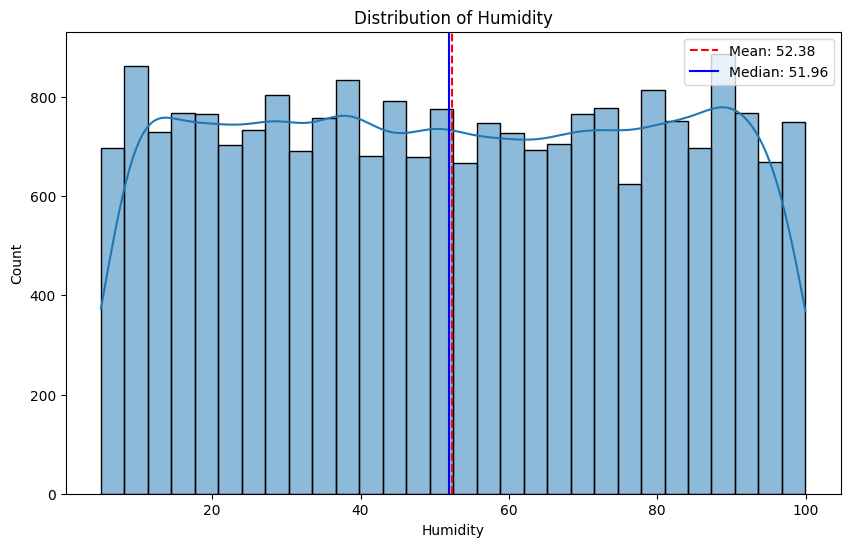

In [279]:
plot_histogram(data, 'Humidity')

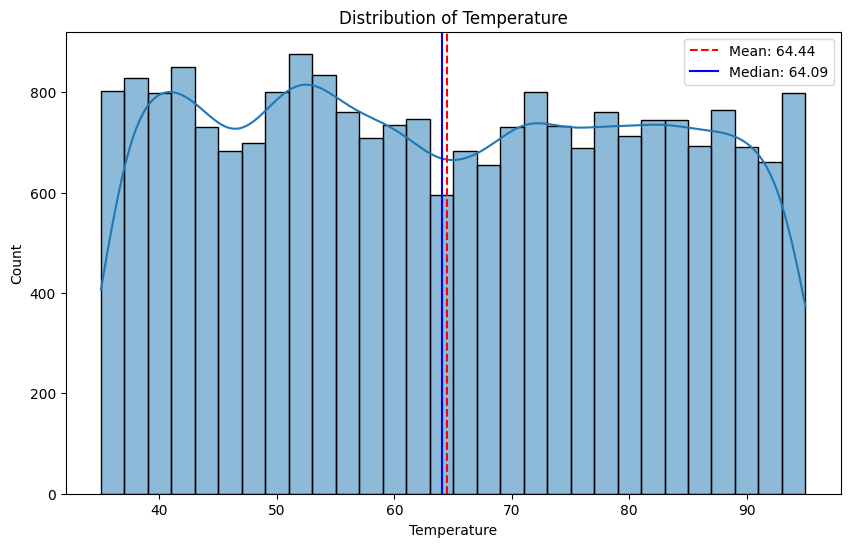

In [280]:
plot_histogram(data, 'Temperature')

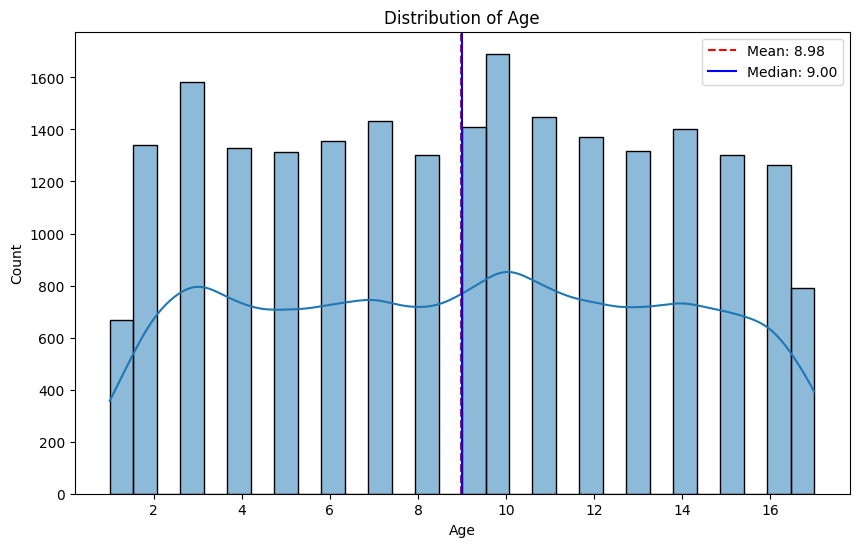

In [281]:
plot_histogram(data, 'Age')

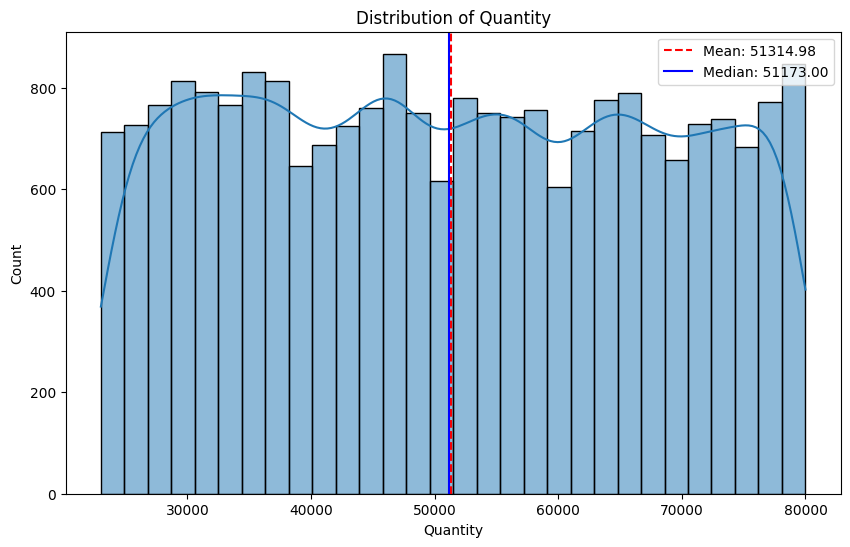

In [282]:
plot_histogram(data, 'Quantity')

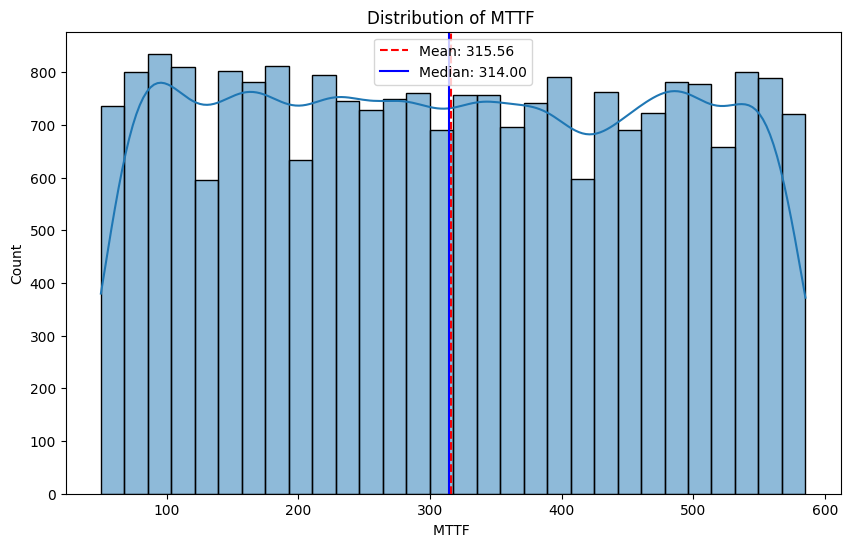

In [283]:
plot_histogram(data, 'MTTF ')

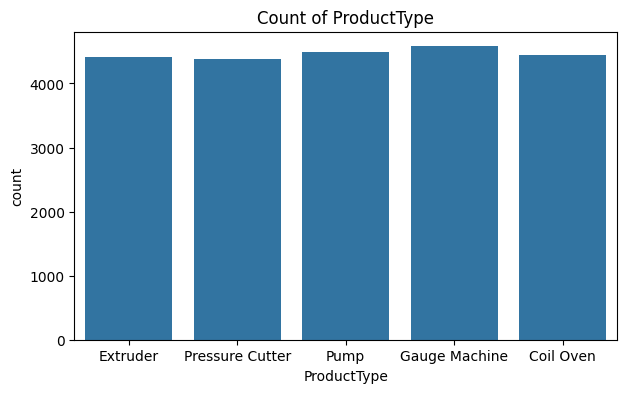

In [284]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in object_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=data[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)

In [285]:
def plot_boxplot(data, column):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

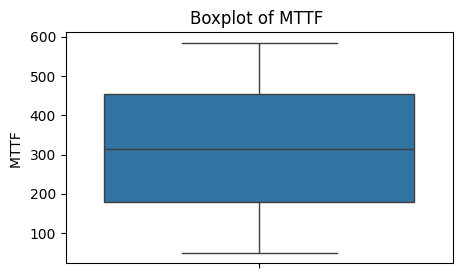

In [286]:
plot_boxplot(data, 'MTTF ')

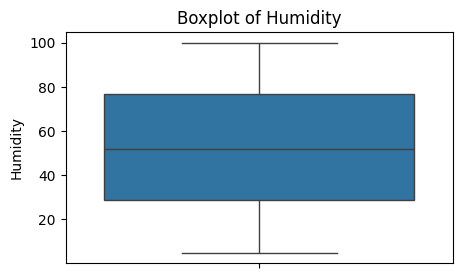

In [287]:
plot_boxplot(data, 'Humidity')

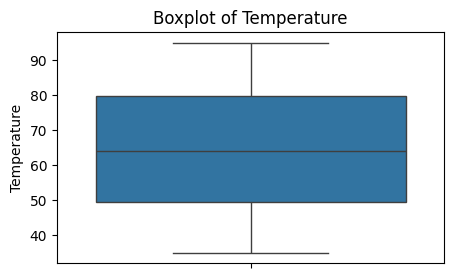

In [288]:
plot_boxplot(data, 'Temperature')

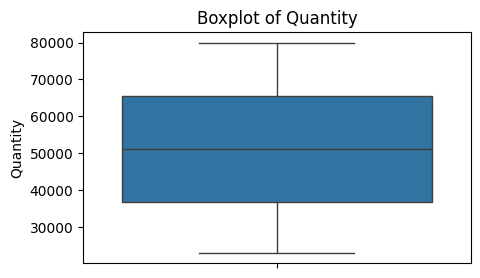

In [289]:
plot_boxplot(data, 'Quantity')

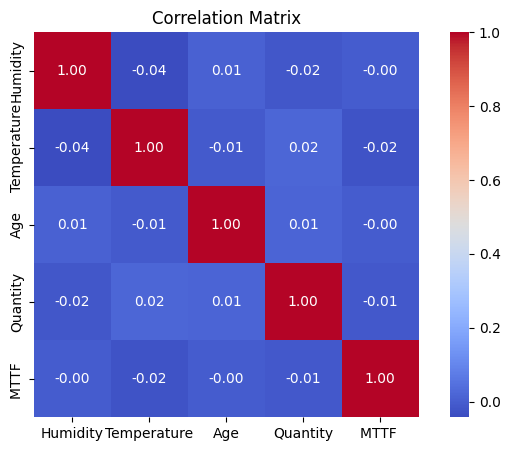

In [290]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data[['Humidity', 'Temperature', 'Age', 'Quantity', 'MTTF ']].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### 4. Data Preprocessing

In [291]:
#Label encoding of categorical columns
object_cols = data.select_dtypes(include=['object']).columns
print(object_cols)

Index(['ProductType'], dtype='object')


In [292]:
encoders = {}
for col in object_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# save the label encoders to a file
import joblib   
joblib.dump(encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [293]:
data.head()

,ProductType,Humidity,Temperature,Age,Quantity,MTTF
0,1,5.88,66.17,13,39764,69
1,3,42.76,40.29,4,45181,532
2,1,76.62,52.08,4,70397,93
3,4,45.91,90.26,14,49470,183
4,2,78.87,58.56,12,45145,447


In [294]:
## Training and Testing Data Split
# Split the dataset into features and target variable
X = data.drop(columns=["MTTF "])  
y = data["MTTF "]

In [295]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Model Training

In [296]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
}

In [297]:
# disctionary to store the cross-validation scores
cv_scores = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_scores[model_name] = scores
    print(f"{model_name} Mean CV Score: {scores.mean():.4f}")
    print("-"* 55)

Training Decision Tree...
Decision Tree Mean CV Score: 0.8954
-------------------------------------------------------
Training Random Forest...
Random Forest Mean CV Score: 0.9161
-------------------------------------------------------


In [298]:
cv_scores

{'Decision Tree': array([0.89404398, 0.89477175, 0.90189761, 0.88235136, 0.90385666]),
 'Random Forest': array([0.91300926, 0.92321751, 0.92119313, 0.90683236, 0.91601138])}

In [299]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 6. Model Evaluation

In [300]:
# Predict
y_pred = model.predict(X_test)

# Evaluation for regression
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))
print("-" * 55)

Mean Absolute Error (MAE): 11.78248263499888
Mean Squared Error (MSE): 872.0483951153931
Root Mean Squared Error (RMSE): 29.530465541799252
R² Score: 0.9629595820916017
-------------------------------------------------------


C:\Users\thean\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [301]:
feature_names = ['Humidity', 'Temperature', 'Age', 'Quantity']  # or list(data.columns)

model_data = {
    "model": model,
    "feature_names": feature_names
}

joblib.dump(model_data, "random_forest_model.pkl")



['random_forest_model.pkl']

### 7. Load the Save Model and build a Predictive System

In [302]:
import joblib

# Load saved model and encoder
model_data = joblib.load('random_forest_model.pkl')
loaded_encoder = joblib.load('label_encoders.pkl')

In [303]:
loaded_model = model_data['model']
feature_names = model_data['feature_names']
print("Model and feature names loaded successfully.")
print("Model:", loaded_model)
print("Feature names:", feature_names)

Model and feature names loaded successfully.
Model: RandomForestRegressor(random_state=42)
Feature names: ['Humidity', 'Temperature', 'Age', 'Quantity']


In [304]:
sample_input = {
    "ProductType": "Extruder",
    "Humidity": 5.88,
    "Temperature": 66.17,
    "Age": 13,
    "Quantity": 39764,
}


In [305]:
input_df = pd.DataFrame([sample_input])
input_df

,ProductType,Humidity,Temperature,Age,Quantity
0,Extruder,5.88,66.17,13,39764


In [306]:
for col, le in loaded_encoder.items():
    if col in input_df.columns:
        input_df[col] = le.transform(input_df[col])

In [307]:
input_df.head()

,ProductType,Humidity,Temperature,Age,Quantity
0,1,5.88,66.17,13,39764


In [308]:
# Predict MTTF using the loaded model
prediction = loaded_model.predict(input_df)

print(f"Predicted MTTF: {prediction[0]:.2f}")


Predicted MTTF: 69.00
